<a href="https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer-for-Eric/blob/main/CoLab_STELLA_raw_data_input_white_card_correct.ipynb" 
    target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:
    !wget 'https://github.com/Philliec459/Launchpad-for-STS-Processing-of-STELLA-Spectrometer-Landsat-and-PACE-Ocean-Data/raw/main/data.csv'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/sts_nasa.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/Spectrum.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_color.gif'


    !pip install ipywidgets
    !pip install altair
    !pip install panel


![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer-for-Eric/blob/main/sts_nasa.png?raw=1)


# **Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer**

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site,

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better".

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range.

>![image](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer-for-Eric/blob/main/Spectrum.png?raw=1)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/




### Load Python requirments:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, FloatRangeSlider, Layout


import matplotlib.colors as mcolors


# **Load STELLA Data and setup this project.**


## 1) Load the Excel data collected on the STELLA-Q2 micro SD card:
---



In [4]:
# 1) read the STELLA data file
file = r'data.csv'
df = pd.read_csv(file,index_col=False)

white = pd.read_csv(file,index_col=False)



# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()

df.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192947Z,19.4964,20,20,...,900,10,5217.29,626.075,940,10,3449.99,413.999,4.16,98
1,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192949Z,19.4969,20,20,...,900,10,5314.53,637.744,940,10,3517.93,422.152,4.16,98
2,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192950Z,19.4972,20,20,...,900,10,5423.45,650.814,940,10,3606.17,432.740,4.16,98
3,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192952Z,19.4978,20,20,...,900,10,5565.70,667.884,940,10,3707.64,444.917,4.16,98
4,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192953Z,19.4980,20,20,...,900,10,5476.79,657.215,940,10,3658.23,438.987,4.16,98


## Assign colors to each unique target name in the Test column:

In [5]:
# Get a list of unique test patterns from the 'Test' column
unique_tests = df['Test'].unique()

# Use a more vibrant colormap like 'Set1' or 'Accent'
colors = plt.cm.get_cmap('Set1', len(unique_tests)).colors  # Use 'Set1' for vibrant colors

# Create the test_colors dictionary with the unique test values and assigned vibrant colors
test_colors = {test: mcolors.rgb2hex(colors[i]) for i, test in enumerate(unique_tests)}

# Now you can use the test_colors dictionary
print(test_colors)

{'White Card Full Sun': '#e41a1c', 'Asphalt': '#377eb8', 'Grass': '#984ea3', 'Shady Grass': '#ffff33', 'White Card Shade': '#f781bf', 'Mud Bank': '#999999'}


/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_38125/3757987900.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_tests)).colors  # Use 'Set1' for vibrant colors


# **Plot Definitions:**

In [6]:
# Raw data plots
def update_plot_dashed(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                #color = 'black'  # Default color for wavelengths not explicitly defined
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value


                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,950)
    #plt.ylim(0,1500)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))



# **Plot Raw Data Over a Continuous Sample Range:**

In [7]:
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot_dashed, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 166), description='Timestamp Range', layout=Layout(width='90%')…

# **Plot the Average White-Card Reading:**

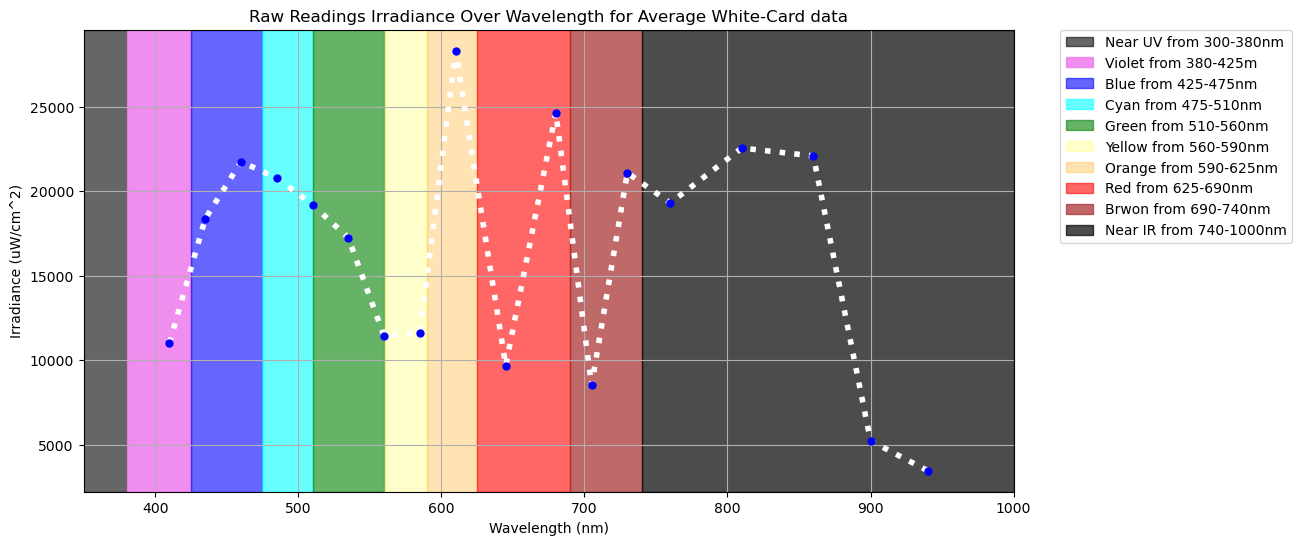

In [8]:
# White-Card average data
def update_plot_white_card():
    plt.figure(figsize=(12, 6))


    # Loop over the range of timestamp indices
    for timestamp_index in range(0, 0 + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in white.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(white[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=4, color='white')

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,30000)
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength for Average White-Card data")
    #plt.title(f"White and Gray Card Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

update_plot_white_card()

## **In the above plot for our white standard, there is a large range of magnitudes across what should be a uniform white specrtum.**

- This is probably related to instrument detector bias.

- Our STS STELLA instrument always has a strong peak at 610nm.

---
---
### **Normalize all STELLA-Q2 Readings to our White-Card Calibration data:**


In [17]:
# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()


white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192947Z,19.4964,20,20,...,900,10,5217.29,626.075,940,10,3449.99,413.999,4.16,98
1,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192949Z,19.4969,20,20,...,900,10,5314.53,637.744,940,10,3517.93,422.152,4.16,98
2,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192950Z,19.4972,20,20,...,900,10,5423.45,650.814,940,10,3606.17,432.740,4.16,98
3,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192952Z,19.4978,20,20,...,900,10,5565.70,667.884,940,10,3707.64,444.917,4.16,98
4,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192953Z,19.4980,20,20,...,900,10,5476.79,657.215,940,10,3658.23,438.987,4.16,98


In [19]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][1]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aquamarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading

#print()
#print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')

print()
print('1) These are our White-Card wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')


scaling_factor_save = []
# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor
    scaling_factor_save.append(scaling_factor)

#print('normalization_factors_saved:',scaling_factor_save)

print()
print('2) These are our White-Card Normalization factors for each Wavelength:',scaling_factors)

# Print scaling factors

k=0
print()
print("Normalization Factors by Wavelength:")
for wavelength, factor in scaling_factors.items():
    print(f"3) These are our final Normalization factors for each wavelength {wavelength}nm: {factor} \tline {k}")
    k=k+1


#print([scaling_factors[factor] for wavelength in wavelengths])


1) These are our White-Card wavelengths and readings from our spectrometer: {'410': 11023.2, '435': 18364.1, '460': 21736.5, '485': 20771.9, '510': 19194.6, '535': 17231.5, '560': 11408.6, '585': 11618.4, '610': 28304.0, '645': 9668.81, '680': 24642.4, '705': 8495.6, '730': 21078.1, '760': 19296.1, '810': 22544.5, '860': 22076.6, '900': 5217.29, '940': 3449.99} used with wavelength 940 nm.

2) These are our White-Card Normalization factors for each Wavelength: {'410': 9.071775890848391e-05, '435': 5.445407071405623e-05, '460': 4.6005566673567504e-05, '485': 4.814196101463997e-05, '510': 5.2097985891865426e-05, '535': 5.803325305399994e-05, '560': 8.76531739214277e-05, '585': 8.607037113544034e-05, '610': 3.533069530808366e-05, '645': 0.0001034253439668377, '680': 4.058046294192124e-05, '705': 0.00011770799001836245, '730': 4.7442606307020084e-05, '760': 5.182394369846757e-05, '810': 4.4356716715828694e-05, '860': 4.529683012782766e-05, '900': 0.0001916703882667055, '940': 0.0002898559

---
# **Plot White-Card Normalized Spectral Data Over a Range of Readings:**


In [20]:
# White-Card Corrected Data
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]



            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor


            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    plt.ylim(0,1.1)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()




# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Add a Boost component to Shady or Cloudy White Card readings
#boost_slider = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description='Boost',orientation='horizontal',layout=Layout(width='90%'))


# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 166), description='Timestamp Range', layout=Layout(width='90%')…